In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
import scipy.stats as st
import numpy as np

df = pd.read_csv("merge_data/merged_data.csv")
df

,Year,StateFIPS,CountyFIPS,Amount,Income,Rate,Income Ratio,LTV,Property Type,First,Race,Gender,Age,Credit Score
0,2009,21,117,148000,75322,0.0488,1.1378,0.80,PT01,2,5,1,36,5
1,2009,21,15,197500,141050,0.0475,2.1307,0.72,PT01,2,5,1,59,5
2,2009,21,117,219000,106017,0.0475,1.6015,0.70,PT01,2,5,2,27,5
3,2009,21,37,244000,125539,0.0500,1.8964,0.80,PT01,2,5,1,32,5
4,2009,21,15,417000,360272,0.0450,5.4422,0.35,PT01,2,5,1,46,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17162,2018,21,111,308000,185086,0.0463,2.5886,0.80,PT01,2,5,1,35,5
17163,2018,51,61,392000,146568,0.0475,1.2506,0.80,PT01,2,5,1,45,5
17164,2018,37,63,292000,107208,0.0463,1.3301,0.80,PT01,1,5,1,39,5
17165,2018,37,147,315200,104844,0.0488,1.7076,0.80,PT01,2,5,1,75,5


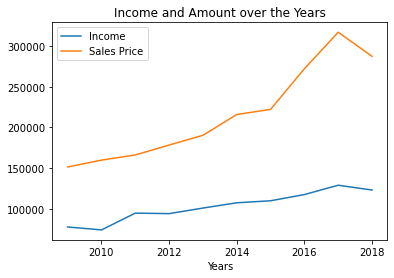

In [2]:
# Create a Graph to represent income vs. price
years_grouped= df.groupby("Year")
x_axis= years_grouped["Year"].unique()
income = years_grouped["Income"].mean()
amount = years_grouped["Amount"].mean()
label= ("Income", "Amount")
#Plot
plt.plot(x_axis, income, label ="Income")
plt.plot(x_axis, amount, label ="Sales Price")
plt.xlabel('Years')
# Set a title of the current axes.
plt.title('Income and Amount over the Years')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

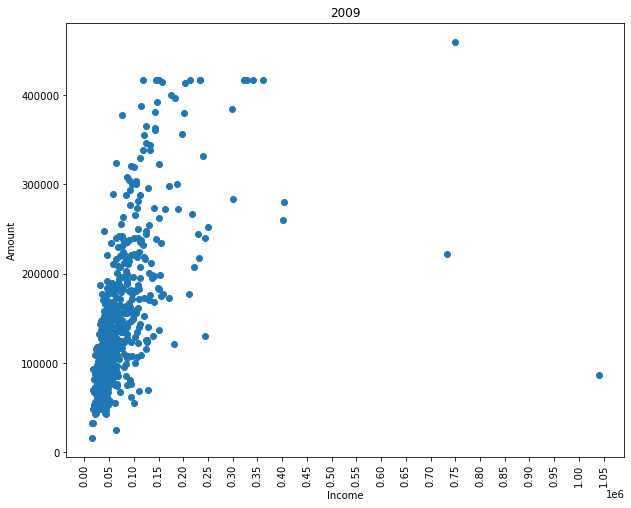

In [3]:
df09= df.loc[df["Year"]== 2009 ,:]
df10 = df.loc[df["Year"]== 2010 ,:]
df11 = df.loc[df["Year"]== 2011 ,:]
df12 = df.loc[df["Year"]== 2012 ,:]
df13 = df.loc[df["Year"]== 2013 ,:]
df14 = df.loc[df["Year"]== 2014 ,:]
df15 = df.loc[df["Year"]== 2015 ,:]
df16 = df.loc[df["Year"]== 2016 ,:]
df17 = df.loc[df["Year"]== 2017 ,:]
df18 = df.loc[df["Year"]== 2018 ,:]

#dataframe= [df09,df10,df11,df12,df13,df14,df15,df16,df17,df18]
#for frame in dataframe:
x_year= df09["Year"]
y_income= df09["Income"]
y_amount= df09["Amount"]
plt.figure(figsize=(10,8))
plt.scatter(y_income, y_amount)
plt.xlabel("Income")
plt.ylabel("Amount")
plt.title("2009")
plt.xticks(np.arange(0, 1100000, step=50000),rotation= 90 )
plt.show()



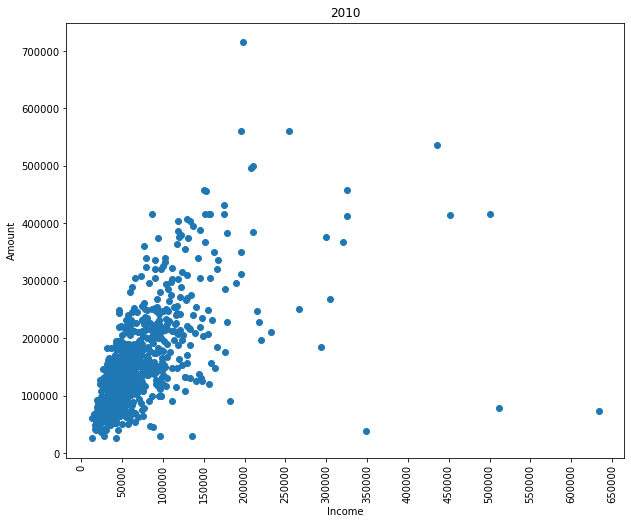

In [4]:
x_year= df10["Year"]
y_income= df10["Income"]
y_amount= df10["Amount"]
plt.figure(figsize=(10,8))
plt.scatter(y_income, y_amount)
plt.xlabel("Income")
plt.ylabel("Amount")
plt.title("2010")
plt.xticks(np.arange(0, 700000, step=50000),rotation= 90 )
plt.show()

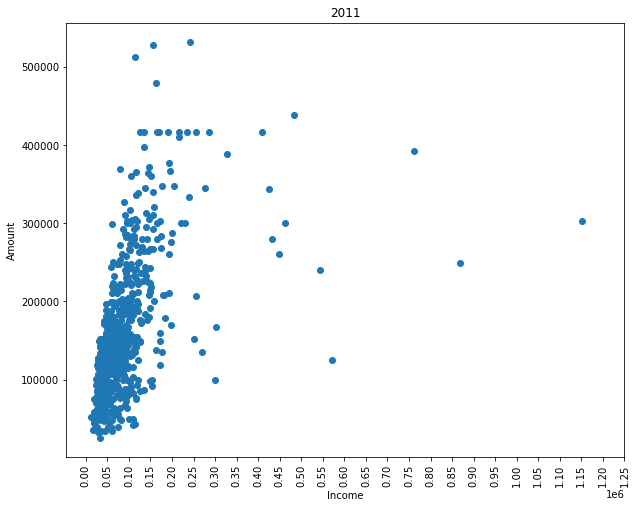

In [5]:
x_year= df11["Year"]
y_income= df11["Income"]
y_amount= df11["Amount"]
plt.figure(figsize=(10,8))
plt.scatter(y_income, y_amount)
plt.xlabel("Income")
plt.ylabel("Amount")
plt.title("2011")
plt.xticks(np.arange(0, 1300000, step=50000),rotation= 90 )
plt.show()

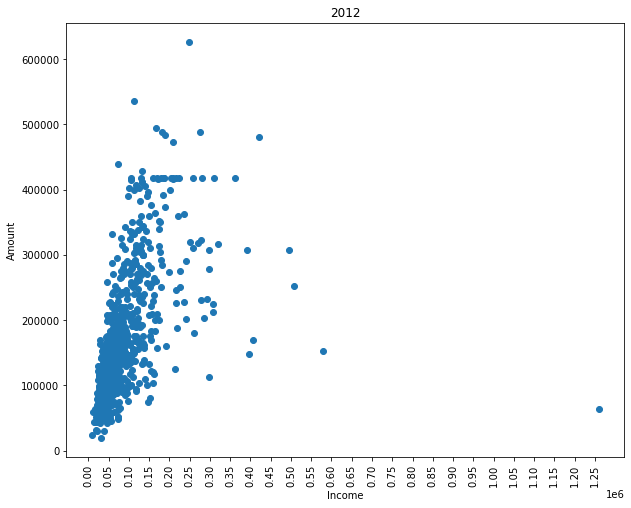

In [6]:
x_year= df12["Year"]
y_income= df12["Income"]
y_amount= df12["Amount"]
plt.figure(figsize=(10,8))
plt.scatter(y_income, y_amount)
plt.xlabel("Income")
plt.ylabel("Amount")
plt.title("2012")
plt.xticks(np.arange(0, 1300000, step=50000),rotation= 90 )
plt.show()

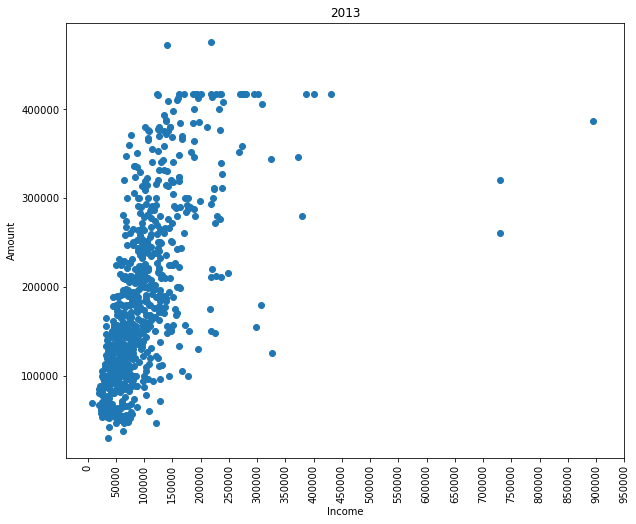

In [7]:
x_year= df13["Year"]
y_income= df13["Income"]
y_amount= df13["Amount"]
plt.figure(figsize=(10,8))
plt.scatter(y_income, y_amount)
plt.xlabel("Income")
plt.ylabel("Amount")
plt.title("2013")
plt.xticks(np.arange(0, 1000000, step=50000),rotation= 90 )
plt.show()

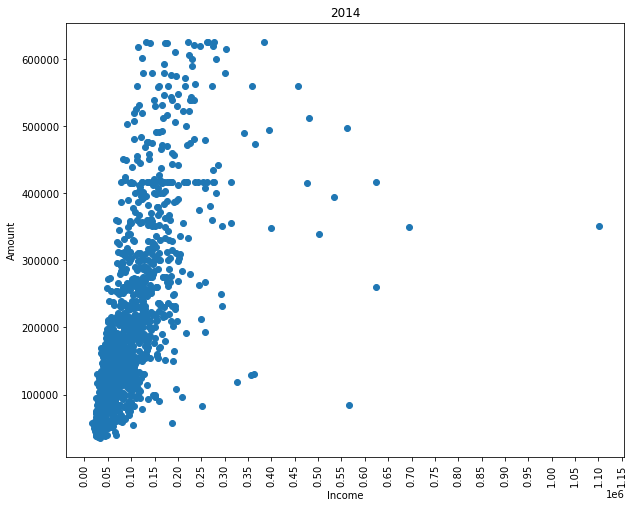

In [8]:
x_year= df14["Year"]
y_income= df14["Income"]
y_amount= df14["Amount"]
plt.figure(figsize=(10,8))
plt.scatter(y_income, y_amount)
plt.xlabel("Income")
plt.ylabel("Amount")
plt.title("2014")
plt.xticks(np.arange(0, 1200000, step=50000),rotation= 90 )
plt.show()

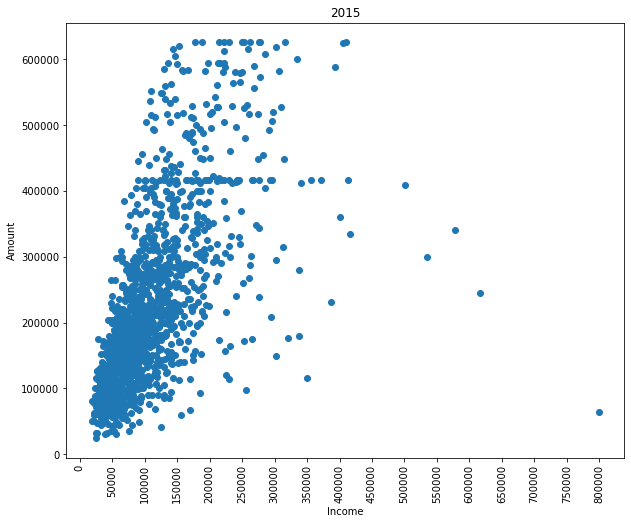

In [9]:
x_year= df15["Year"]
y_income= df15["Income"]
y_amount= df15["Amount"]
plt.figure(figsize=(10,8))
plt.scatter(y_income, y_amount)
plt.xlabel("Income")
plt.ylabel("Amount")
plt.title("2015")
plt.xticks(np.arange(0, 850000, step=50000),rotation= 90 )
plt.show()

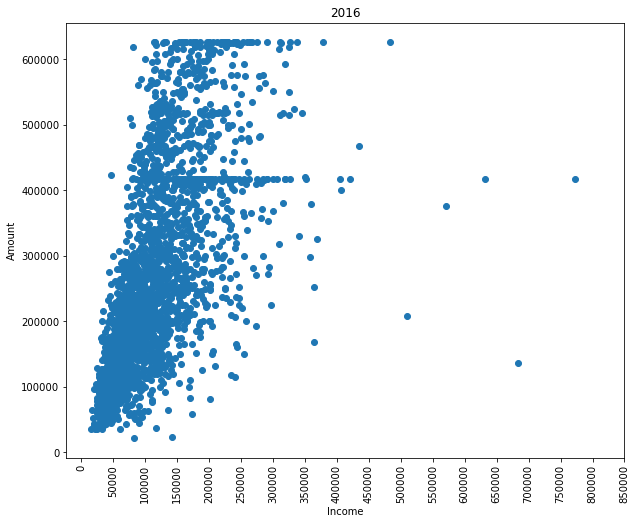

In [10]:
x_year= df16["Year"]
y_income= df16["Income"]
y_amount= df16["Amount"]
plt.figure(figsize=(10,8))
plt.scatter(y_income, y_amount)
plt.xlabel("Income")
plt.ylabel("Amount")
plt.title("2016")
plt.xticks(np.arange(0, 900000, step=50000),rotation= 90 )
plt.show()

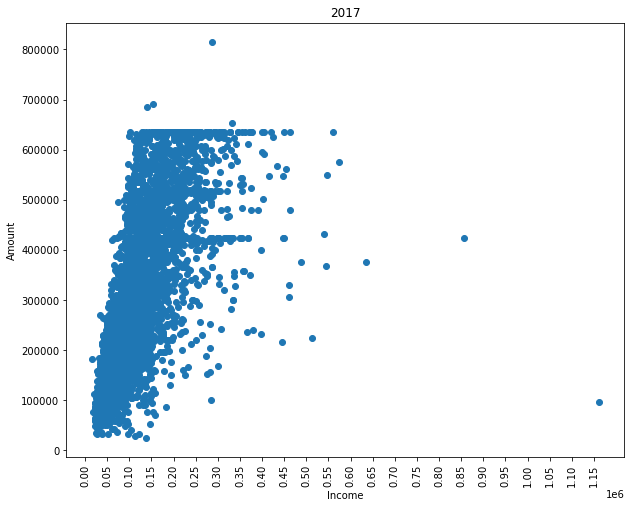

In [11]:
x_year= df17["Year"]
y_income= df17["Income"]
y_amount= df17["Amount"]
plt.figure(figsize=(10,8))
plt.scatter(y_income, y_amount)
plt.xlabel("Income")
plt.ylabel("Amount")
plt.title("2017")
plt.xticks(np.arange(0, 1200000, step=50000),rotation= 90 )
plt.show()

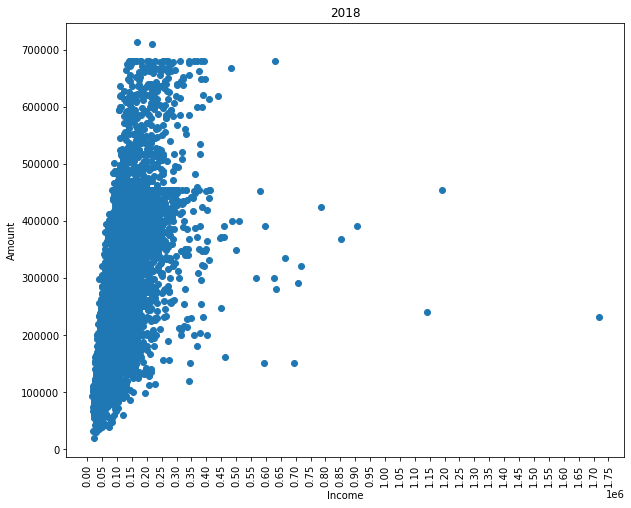

In [12]:
x_year= df18["Year"]
y_income= df18["Income"]
y_amount= df18["Amount"]
plt.figure(figsize=(10,8))
plt.scatter(y_income, y_amount)
plt.xlabel("Income")
plt.ylabel("Amount")
plt.title("2018")
plt.xticks(np.arange(0, 1800000, step=50000),rotation= 90 )
plt.show()

99
18


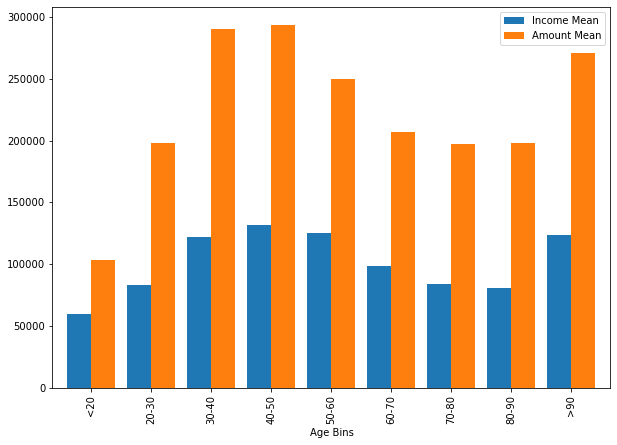

In [13]:
# Create Graph and bin age to see sales price
max_age = df["Age"].max()
min_age = df["Age"].min()
print(max_age)
print(min_age)

bins = [10,20,30,40,50,60,70,80,90,100]
group_names= ["<20", '20-30', '30-40', '40-50', '50-60','60-70', '70-80', '80-90', '>90']
df["Age Bins"] = pd.cut(df["Age"], bins, labels=group_names, include_lowest=True)

age_group= df.groupby(df["Age Bins"])
age_income= age_group["Income"].mean()
age_amount= age_group["Amount"].mean()

summary_df = pd.DataFrame({"Income Mean": age_income,
                          "Amount Mean": age_amount})
summary_df.plot(kind= "bar", figsize = (10,7) ,rot=90, width=.8)
plt.show()

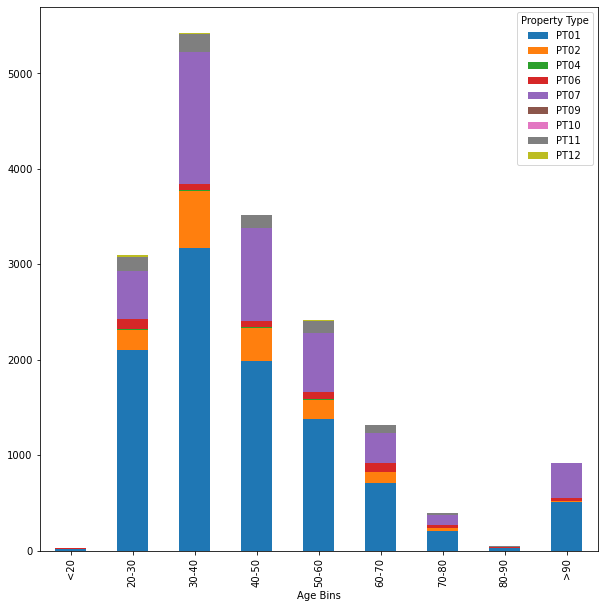

In [14]:
# Create graph and bin age and compare it to property type
bins = [10,20,30,40,50,60,70,80,90,100]
group_names= ["<20", '20-30', '30-40', '40-50', '50-60','60-70', '70-80', '80-90', '>90']
df["Age Bins"] = pd.cut(df["Age"], bins, labels=group_names, include_lowest=True)

df2 = df.groupby(['Age Bins','Property Type'])['Age Bins'].count().unstack('Property Type').fillna(0)
df2[['PT01','PT02', 'PT04', 'PT06', 'PT07', 'PT09', 'PT10',
     'PT11','PT12']].plot(kind='bar', stacked=True, figsize= (10,10))
plt.show()

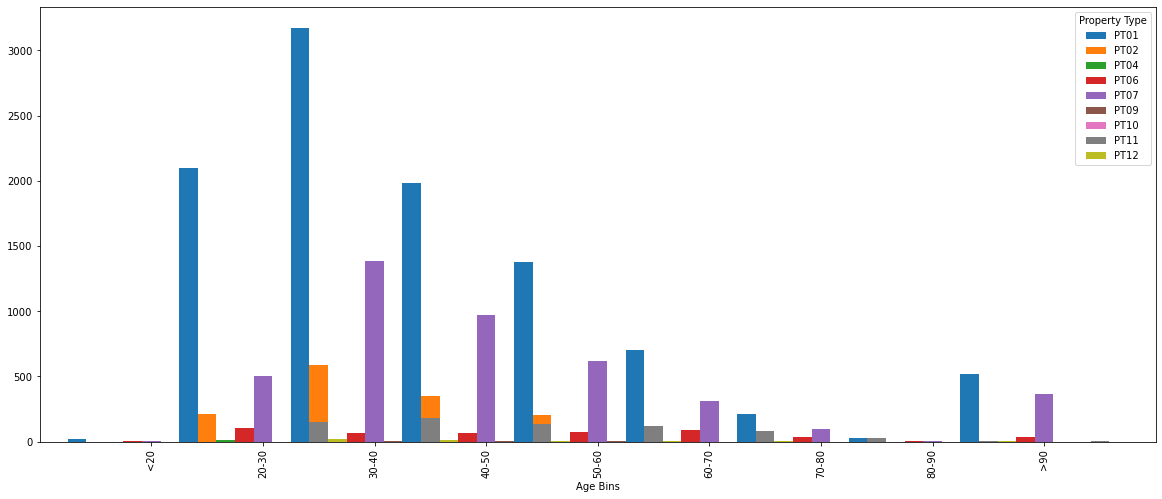

In [15]:
bins = [10,20,30,40,50,60,70,80,90,100]
group_names= ["<20", '20-30', '30-40', '40-50', '50-60','60-70', '70-80', '80-90', '>90']
df["Age Bins"] = pd.cut(df["Age"], bins, labels=group_names, include_lowest=True)

df2 = df.groupby(['Age Bins','Property Type'])['Age Bins'].count().unstack('Property Type').fillna(0)
df2[['PT01','PT02', 'PT04', 'PT06', 'PT07', 'PT09', 'PT10',
     'PT11','PT12']].plot(kind='bar', figsize= (20,8), width=1.5)
plt.show()

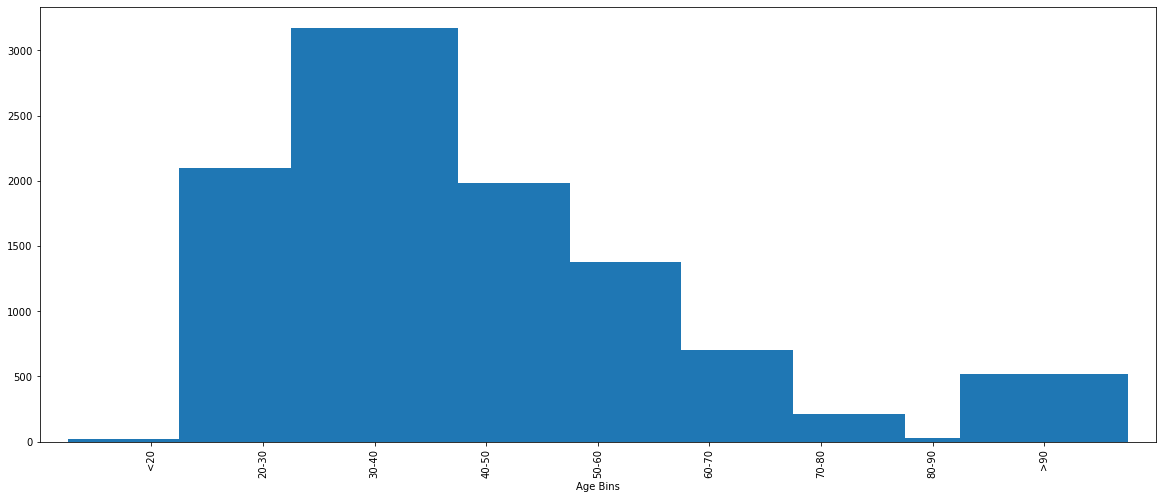

In [17]:
df3 = df.groupby(['Age Bins','Property Type'])['Age Bins'].count().unstack('Property Type').fillna(0)
df3['PT01'].plot(kind='bar', figsize= (20,8), width=1.5)
plt.show()

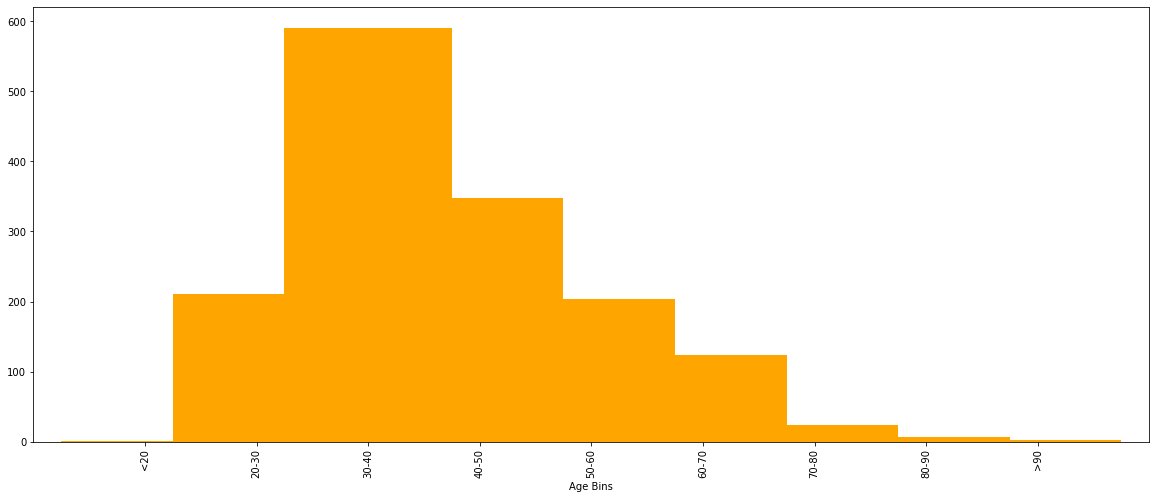

In [19]:
df4 = df.groupby(['Age Bins','Property Type'])['Age Bins'].count().unstack('Property Type').fillna(0)
df4['PT02'].plot(kind='bar', figsize= (20,8), width=1.5, color= "Orange")
plt.show()

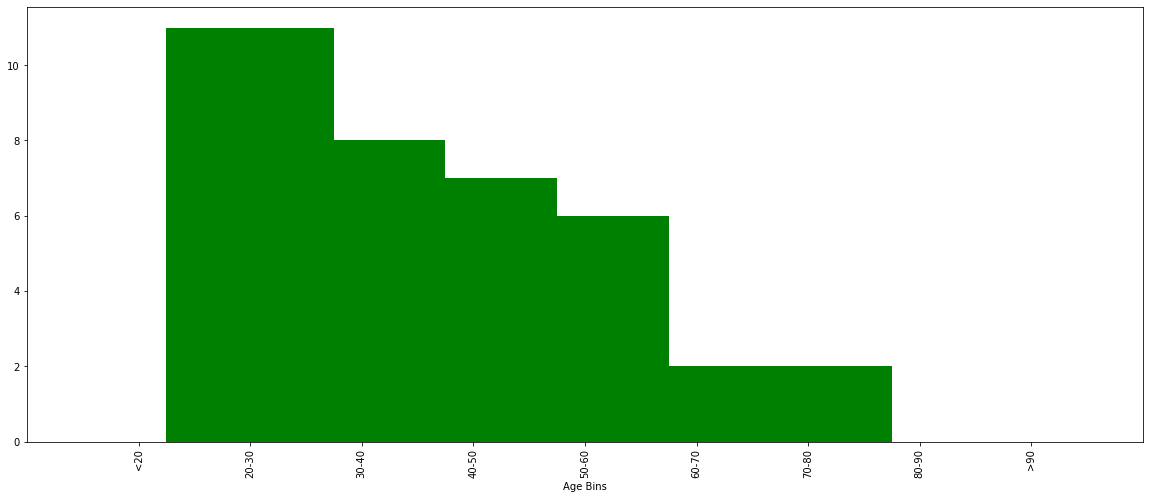

In [20]:
df5 = df.groupby(['Age Bins','Property Type'])['Age Bins'].count().unstack('Property Type').fillna(0)
df5['PT04'].plot(kind='bar', figsize= (20,8), width=1.5, color= "Green")
plt.show()

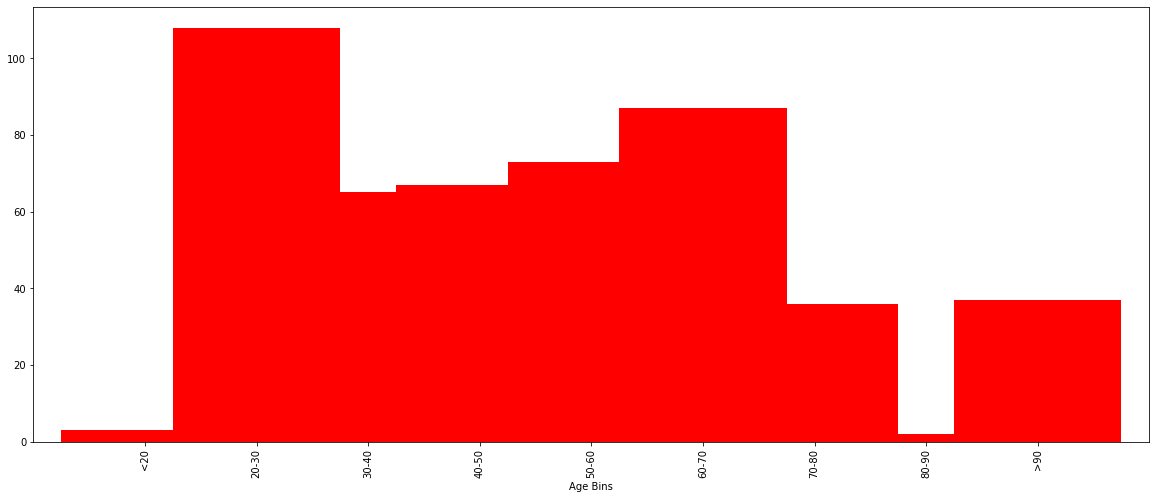

In [21]:
df6 = df.groupby(['Age Bins','Property Type'])['Age Bins'].count().unstack('Property Type').fillna(0)
df6['PT06'].plot(kind='bar', figsize= (20,8), width=1.5, color= "Red")
plt.show()

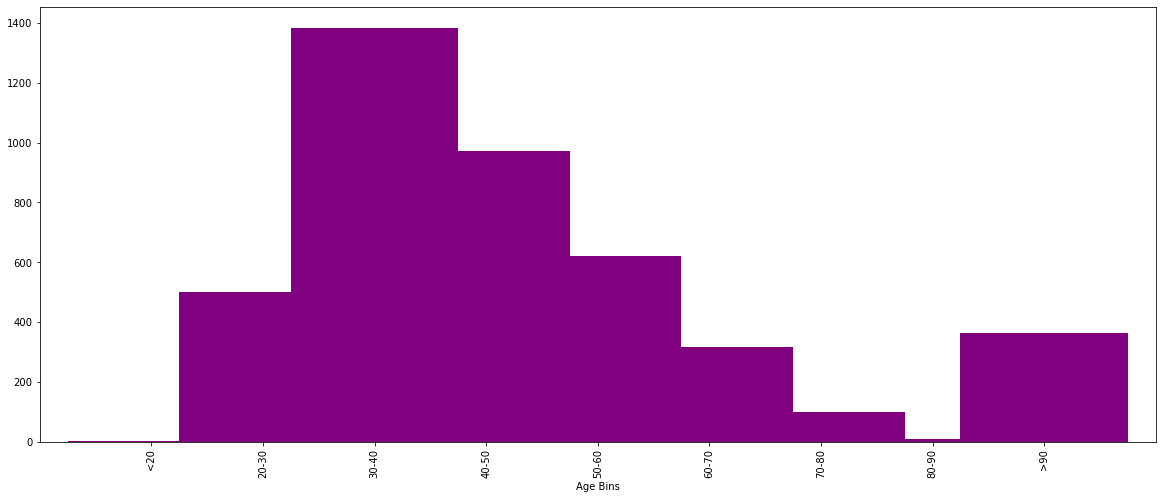

In [22]:
df7 = df.groupby(['Age Bins','Property Type'])['Age Bins'].count().unstack('Property Type').fillna(0)
df7['PT07'].plot(kind='bar', figsize= (20,8), width=1.5, color= "Purple")
plt.show()

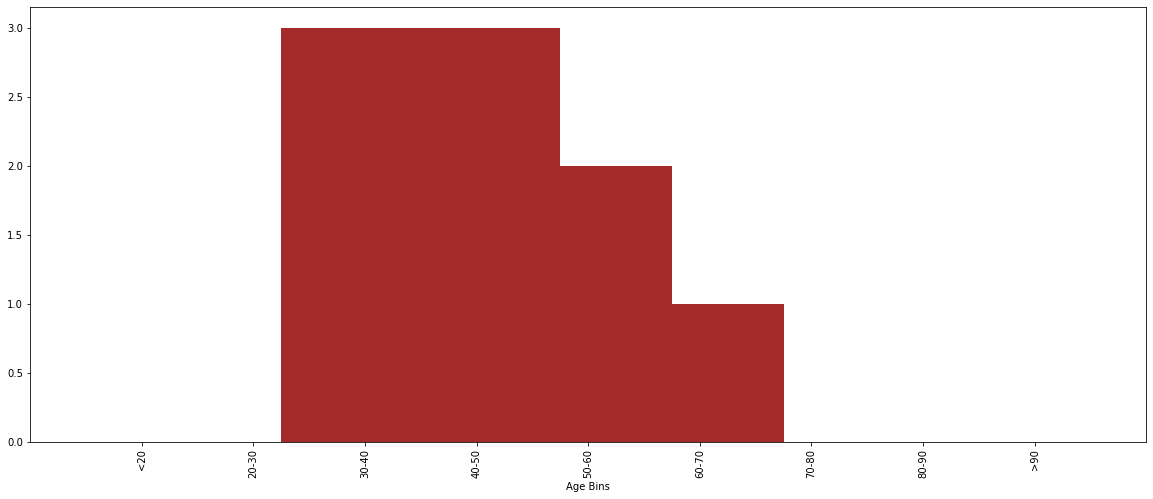

In [23]:
df8 = df.groupby(['Age Bins','Property Type'])['Age Bins'].count().unstack('Property Type').fillna(0)
df8['PT09'].plot(kind='bar', figsize= (20,8), width=1.5, color= "Brown")
plt.show()

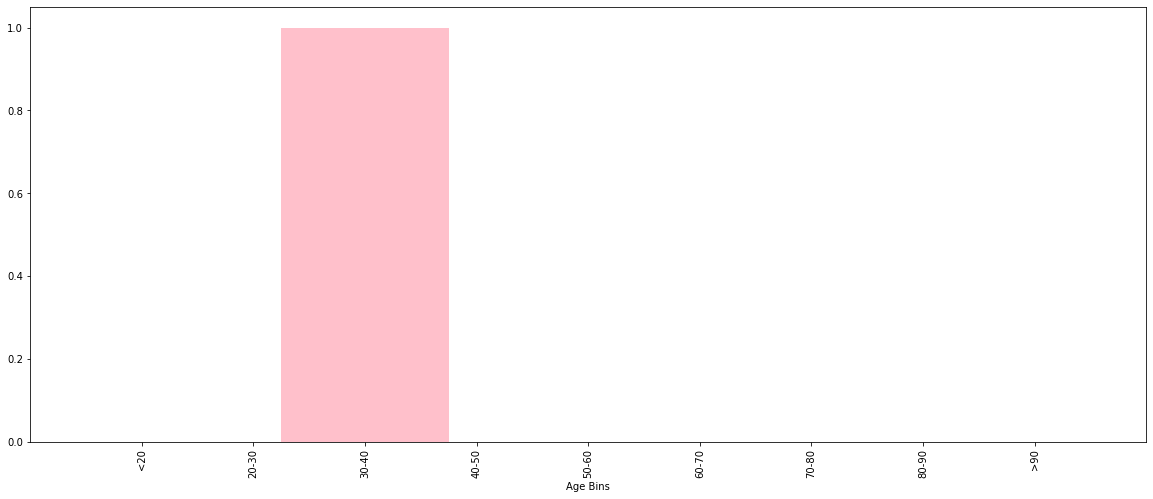

In [24]:
df9 = df.groupby(['Age Bins','Property Type'])['Age Bins'].count().unstack('Property Type').fillna(0)
df9['PT10'].plot(kind='bar', figsize= (20,8), width=1.5, color= "Pink")
plt.show()

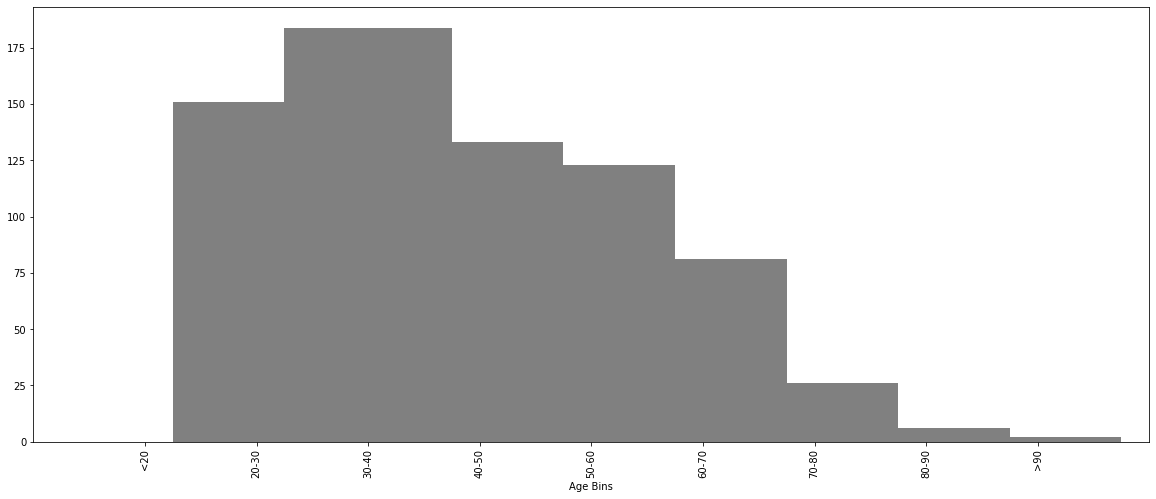

In [25]:
df10 = df.groupby(['Age Bins','Property Type'])['Age Bins'].count().unstack('Property Type').fillna(0)
df10['PT11'].plot(kind='bar', figsize= (20,8), width=1.5, color= "Grey")
plt.show()

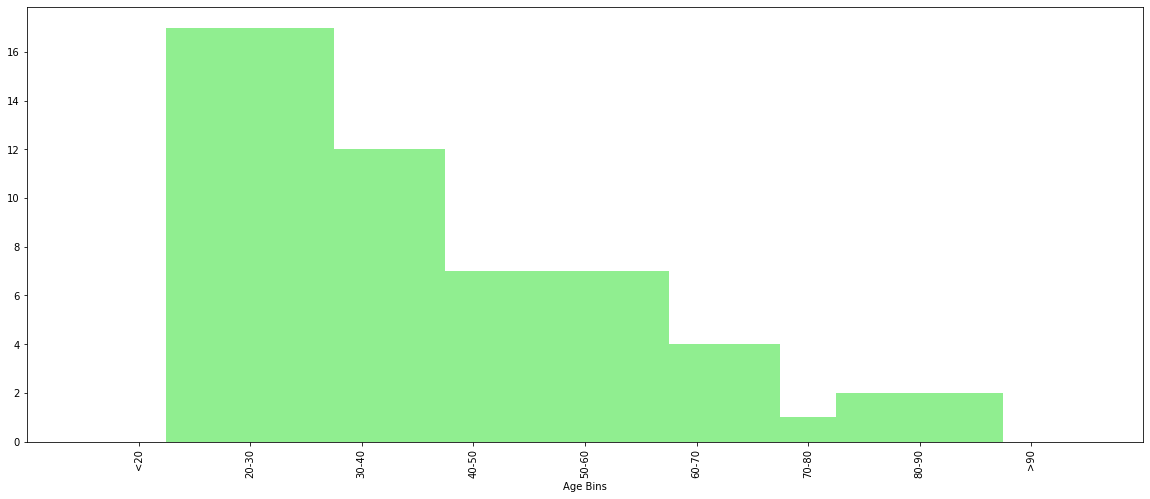

In [28]:
df11 = df.groupby(['Age Bins','Property Type'])['Age Bins'].count().unstack('Property Type').fillna(0)
df11['PT12'].plot(kind='bar', figsize= (20,8), width=1.5, color= "lightgreen")
plt.show()

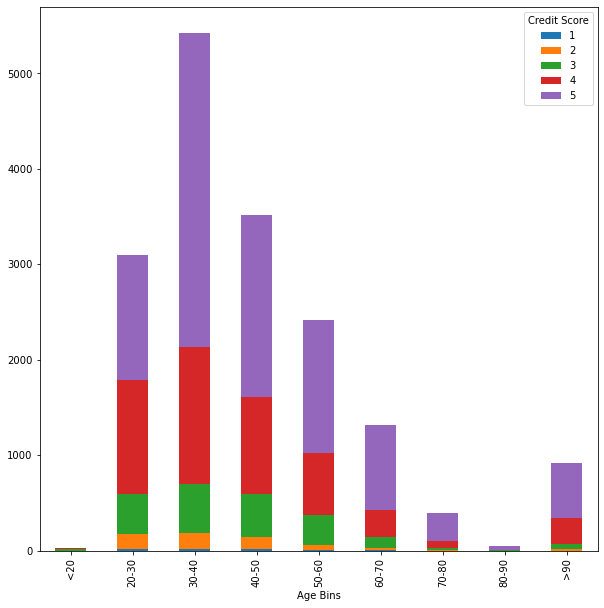

In [31]:
bins = [10,20,30,40,50,60,70,80,90,100]
group_names= ["<20", '20-30', '30-40', '40-50', '50-60','60-70', '70-80', '80-90', '>90']
df["Age Bins"] = pd.cut(df["Age"], bins, labels=group_names, include_lowest=True)

df12 = df.groupby(['Age Bins','Credit Score'])['Age Bins'].count().unstack('Credit Score').fillna(0)
df12[[1, 2, 3, 4, 5]].plot(kind='bar', stacked=True, figsize= (10,10))
plt.show()

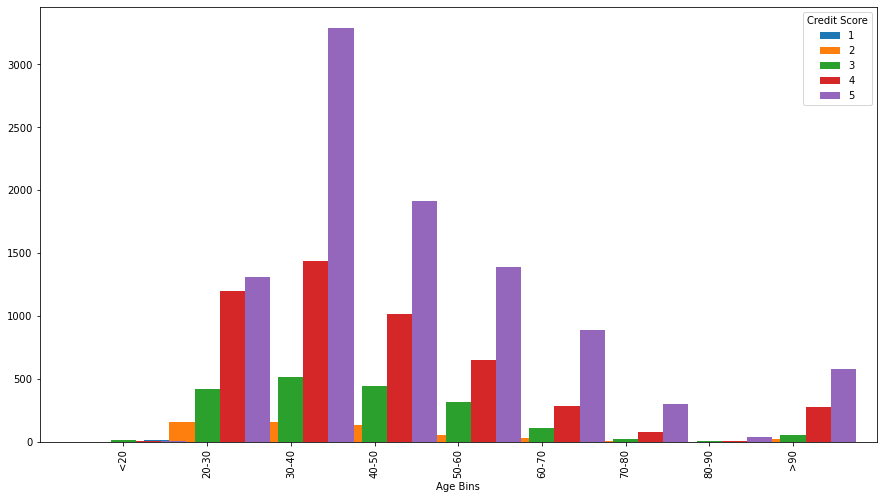

In [33]:
bins = [10,20,30,40,50,60,70,80,90,100]
group_names= ["<20", '20-30', '30-40', '40-50', '50-60','60-70', '70-80', '80-90', '>90']
df["Age Bins"] = pd.cut(df["Age"], bins, labels=group_names, include_lowest=True)

df13 = df.groupby(['Age Bins','Credit Score'])['Age Bins'].count().unstack('Credit Score').fillna(0)
df13[[1, 2, 3, 4, 5]].plot(kind='bar', figsize= (15,8), width=1.5)
plt.show()

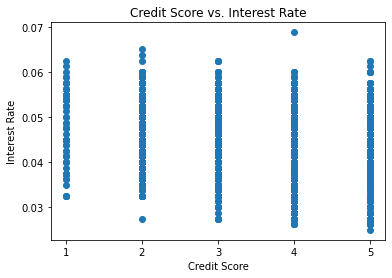

In [42]:
#Credit Score vs. Interest Rate
credit= df["Credit Score"]
interest= df["Rate"]
plt.scatter(credit, interest)
plt.xlabel("Credit Score")
plt.ylabel("Interest Rate")
plt.title("Credit Score vs. Interest Rate")
plt.xticks(np.arange(1, 6, step=1))
plt.show()